# Clase 2 - Semana 7
#### Temas Selectos Proceso Químicos: Análisis de Datos con Python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Series temporales



**texto en negrita** *texto en cursiva*
$$A_1$$

#  Características principales de una serie temporal

Una **serie temporal** es un conjunto de observaciones ordenadas en el tiempo. Para analizarla, es fundamental identificar sus patrones y propiedades internas.

---

##  1. Tendencia (Trend)
La **tendencia** es el movimiento general de la serie a largo plazo. Puede ser:
- Creciente
- Decreciente
- Constante

Representa cambios sostenidos no explicados por fluctuaciones aleatorias.

---

##  2. Estacionalidad (Seasonality)
La **estacionalidad** son patrones que se repiten de manera **regular** en el tiempo.
- Puede ser diaria, semanal, mensual, anual, etc.
- Ocurre cuando ciertos periodos tienen comportamientos recurrentes.

Ejemplo: aumento de ventas en diciembre.

---

## 3. Ciclos (Cycles)
Los **ciclos** son fluctuaciones que se repiten en el largo plazo, pero **no tienen periodicidad fija**.
- Duración variable.
- Suelen relacionarse con economía, clima o procesos industriales.

---

##  4. Ruido o Componente Aleatoria (Noise)
Es la parte **impredecible** de la serie.
- Variación irregular que no se explica por tendencia, estacionalidad o ciclos.

---

##  5. Estacionariedad (Stationarity)
Una serie es **estacionaria** si sus propiedades estadísticas se mantienen constantes en el tiempo:
- Media constante
- Varianza constante
- DE
- Covarianza dependiente solo del desfase (lag), no del tiempo

Muchos modelos como ARIMA requieren estacionariedad.

---

##  6. Autocorrelación (ACF y PACF)
La **autocorrelación** mide qué tanto una observación está relacionada con sus valores pasados.
- Ayuda a detectar rezagos importantes.
- Permite identificar estacionalidad y memoria temporal.

---

##  7. Nivel (Level)
Es el valor promedio o base alrededor del cual oscila la serie.
- Puede cambiar por choques o eventos externos.

---

##  8. Cambios estructurales (Structural breaks)
Son **rupturas** o cambios fuertes en la dinámica de la serie.
- Pandemias, crisis económicas, cambios de política, fallas de equipo.
- Pueden alterar tendencia, varianza o nivel.

---

##  9. Volatilidad (Volatility)
Variación de la **dispersión** a lo largo del tiempo.
- Si la varianza cambia → heterocedasticidad.
- Común en datos financieros y procesos industriales variables.

---



In [ ]:
ruta="https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/rama_2015.csv"

In [ ]:
# Lee el archivo CSV ubicado en 'ruta' y lo carga en un DataFrame llamado df_15.
# 'parse_dates = True' indica que se intenten interpretar las fechas automáticamente.
# 'index_col = 0' usa la primera columna del archivo como índice del DataFrame.
df_15 = pd.read_csv(ruta, parse_dates=True, index_col=0)

# Muestra las primeras 5 filas del DataFrame para verificar que se cargó correctamente.
df_15.head()


,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
fecha,,,,,,,,
2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052
2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061
2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789


# Test de Mann-Kendall para detectar tendencia en series temporales

El **test de Mann-Kendall** es una prueba **no paramétrica** utilizada para detectar si existe una **tendencia monótona** (creciente o decreciente) en una serie temporal.

> Monótona = que en promedio va subiendo o bajando, pero no necesariamente de forma lineal.


#  Test de Mann–Kendall

El **estadístico de prueba S** para una serie temporal $( p_1, p_2, p_3, \ldots, p_n )$ se calcula como:

$$
S = \sum_{j=1}^{n-1} \sum_{k=j+1}^{n} \operatorname{sign}(p_k - p_j)
$$

donde:

La función `sign` se define como:

$$
\operatorname{sign}(p_k - p_j) =
\begin{cases}
1 & \text{si } (p_k - p_j) > 0 \\
0 & \text{si } (p_k - p_j) = 0 \\
-1 & \text{si } (p_k - p_j) < 0
\end{cases}
$$

---

## Varianza del estadístico S

La varianza de \( S \) se estima mediante:

$$
VAR(S) = \frac{1}{18}
\left[
n(n-1)(2n+5) \;-\;
\sum_{j=1}^{g} T_j (T_j - 1)(2T_j + 5)
\right]
$$

donde:

- \( n \): número total de observaciones.  
- \( g \): número de grupos de empates (valores repetidos).  
- $( T_j )$: número de veces que se repite un valor en el grupo \( j \).

---

## Estadístico Z estandarizado

A partir de \( S \) y \( VAR(S) \), el estadístico Z se calcula como:

$$
Z =
\begin{cases}
\dfrac{S - 1}{\sqrt{VAR(S)}} & \text{si } S > 0 \\[10pt]
0 & \text{si } S = 0 \\[10pt]
\dfrac{S + 1}{\sqrt{VAR(S)}} & \text{si } S < 0
\end{cases}
$$

Este valor Z permite obtener el **p-valor** y evaluar la significancia estadística de la tendencia.


### Regla de decisión

- Si $|Z| > Z_{\alpha/2}$, se rechaza $H_0$.
- Por ejemplo, para $\alpha = 0.05$, se rechaza $H_0$ si $|Z| > 1.96$.


---

## ¿Para qué sirve el test de Mann-Kendall?

Sirve para responder:

- ¿Mi serie temporal tiene una **tendencia significativa**?
- En caso afirmativo, ¿la tendencia es **creciente** o **decreciente**?
- ¿O los cambios son simplemente **fluctuaciones aleatorias**?


---

##  Hipótesis del test

- **Hipótesis nula $(H_0)$**:  
  No existe tendencia monótona en la serie (los datos son aleatorios en el tiempo).

- **Hipótesis alternativa $(H_1)$**:  
  Sí existe una tendencia monótona (creciente o decreciente) en la serie.

---

## Idea básica del test

El test compara **todas las parejas de puntos** $(x_i, x_j)$ con \(j > i\):

- Si $(x_j > x_i)$ → suma $(+1)$
- Si $(x_j < x_i)$ → suma $(-1)$
- Si $(x_j = x_i)$ → suma $(0)$
Con esto se construye una estadística llamada **S**:

- \(S > 0\) → indica una tendencia **creciente**
- \(S < 0\) → indica una tendencia **decreciente**
- Luego se estandariza S para obtener un valor **Z** y su **p-valor**

---

## Interpretación del resultado

Al aplicar el test, normalmente obtenemos:

- Estadístico **Z**
- **p-valor**
- Tipo de tendencia

Regla típica (con $(\alpha = 0.05)$):

- Si `p-valor < 0.05` → **rechazamos $(H_0)$**  
  ⇒ Hay evidencia de tendencia significativa.
- Si `p-valor ≥ 0.05` → **no rechazamos $(H_0)$**  
  ⇒ No hay evidencia suficiente de tendencia.

Signo de Z (o de S):

- **Z > 0** → tendencia **creciente**
- **Z < 0** → tendencia **decreciente**

---

## Supuestos del test de Mann-Kendall

- Los datos están **ordenados en el tiempo**.
- Las observaciones son **independientes** entre sí.
- No debe haber **estacionalidad fuerte** (si la hay, se usa una variante: *Seasonal Mann-Kendall*).
- No requiere que los datos sean normales (es **no paramétrico**).

---

## Ventajas y desventajas

**Ventajas:**
- No requiere normalidad.
- Robusto frente a valores atípicos moderados.
- Fácil de interpretar (tendencia sí / no, y en qué sentido).

 **Desventajas:**
- No modela la forma de la tendencia (solo dice si hay o no).
- Afectado por autocorrelación fuerte en la serie (puede aumentar falsos positivos).

---


#  Pendiente de Sen (Sen’s slope)

La **pendiente de Sen** (o **Sen’s slope / Theil–Sen**) se usa para **cuantificar la magnitud de la tendencia** en una serie temporal.  
Mientras que el test de Mann–Kendall indica si hay tendencia significativa, la pendiente de Sen indica **cuánto cambia la variable por unidad de tiempo**.



$$
\hat{\beta} = \text{mediana} \left( \frac{x_j - x_i}{j - i} \right), \quad \text{para } j > i
$$

Esta pendiente representa el cambio por unidad de tiempo y es robusta frente a valores atípicos.

---

## ¿Para qué se usa?

### a) Medir cuánto cambia la serie en el tiempo
- Ejemplo:  
  Pendiente de Sen = **0.32 unidades/año**  
  → la serie aumenta, en promedio, **0.32 unidades por año**.

### b) Medir la intensidad de la tendencia
Es un estimador **robusto** porque:
- No se ve muy afectado por valores atípicos.
- No requiere que los datos sean normales.
- Es adecuado para datos ambientales, hidrológicos y de procesos.

### c) Complementar el test de Mann–Kendall

| Método              | ¿Qué responde?                               |
|---------------------|-----------------------------------------------|
| Test de Mann–Kendall| ¿Hay tendencia significativa? (sí / no)       |
| Pendiente de Sen    | ¿Cuánto cambia la variable en el tiempo?     |

---

##  Interpretación

- **Pendiente > 0** → tendencia **creciente**.  
- **Pendiente < 0** → tendencia **decreciente**.  
- **Pendiente ≈ 0** → cambios muy pequeños, tendencia débil o casi nula.


https://digital.library.unt.edu/ark:/67531/metadc1197046/m2/1/high_res_d/7037501.pdf

# Cuándo se usa

- Series de tiempo ambientales: temperatura, precipitación, calidad del aire, Evapotranspiración, etc.
- Datos hidrológicos: caudales, niveles freáticos, calidad del agua (pH, conductividad, nitratos, concentración de contaminantes, etc
- Datos ambientales: índices de calidad del aire, nivel del mar o retroceso de glaciares.
- Datos ecológicos: tamaño de poblaciones animales o vegetales a lo largo del tiempo, cambios en el uso del suelo, biodiversidad en estaciones anuales.
- Datos socioeconómicos: crecimiento poblacional, índices de pobreza o desigualdad, producción agrícola o consumo energético anual.
- Datos de series financieras (de forma limitada): Precios de commodities a largo plazo (ej. petróleo, oro), consumo energético o producción industrial.

## Cuándo es especialmente útil

- Cuando los datos no son normalmente distribuidos.
- Cuando hay valores atípicos o ruido (la prueba es robusta).
- Cuando se sospecha una tendencia monótona, pero no necesariamente lineal.
- En estudios de impacto del cambio climático o evaluación de políticas públicas a largo plazo.

In [ ]:
#!pip install pymannkendall

In [ ]:

import pymannkendall as mk # Importa la librería pymannkendall, que permite aplicar el test de Mann-Kendall
# para evaluar tendencias en series temporales

####  Resultado de `mk.original_test()`

Al ejecutar `mk.original_test(x, alpha=0.05)`, se obtiene un objeto con los siguientes campos:

| Atributo     | Descripción |
|--------------|-------------|
| `trend`      | Tendencia detectada: puede ser `'increasing'`, `'decreasing'` o `'no trend'`. Indica si hay una tendencia monótona en la serie. |
| `h`          | Resultado de la hipótesis: `True` si se **rechaza** la hipótesis nula $H_0$ (es decir, **hay una tendencia significativa**), `False` en caso contrario. |
| `p`          | Valor-$p$ asociado al estadístico $Z$. Si $p < \alpha$, se rechaza $H_0$ y se concluye que existe una tendencia significativa. |
| `z`          | Estadístico $Z$ estandarizado (normal) obtenido a partir del estadístico $S$ y su varianza. Se usa para calcular el valor-$p$. |
| `Tau`        | Coeficiente Tau de Kendall: mide la fuerza de la asociación monótona entre las observaciones. Su valor está en el rango $[-1, 1]$. |
| `s`          | Estadístico $S$, que cuenta el número de pares concordantes menos discordantes. |
| `var_s`      | Varianza de $S$. Se calcula considerando empates si los hay. |
| `slope`      | Pendiente de Sen ($\hat{\beta}$): representa la magnitud del cambio por unidad de tiempo. Es la mediana de todas las pendientes entre pares de puntos. |
| `intercept`  | Intersección con el eje $y$ de la línea de tendencia basada en la pendiente de Sen. Es decir, si la tendencia es lineal, la recta es: $y = \hat{\beta} \cdot t + \text{intercept}$. |

In [ ]:
resultado = mk.original_test(df_15['PM10'], alpha = 0.05) # Aplica el test de Mann-Kendall a la columna 'PM10' del DataFrame df_15.
resultado

Mann_Kendall_Test(trend='decreasing', h=np.True_, p=np.float64(0.012908845896614007), z=np.float64(-2.486274203194176), Tau=np.float64(-0.08718952280596116), s=np.float64(-5792.0), var_s=5425116.666666667, slope=np.float64(-0.02072633401418798), intercept=np.float64(45.04943944450191))

### Resultado del Test de Mann–Kendall para PM10

**Conclusión general:**  
La serie presenta una **tendencia monótona decreciente**, estadísticamente significativa.

**Resultados principales:**
- **Tendencia:** decreasing  
- **¿Es significativa?:** h = True  
- **p-valor:** 0.0129  
- **Estadístico Z:** -2.486  
- **Tau de Kendall:** -0.087 (tendencia débil)  
- **S** -57952
- **VAR-S** -5425116
- **Pendiente de Sen:** -0.0207 unidades por periodo  
- **Interpretación:** En promedio, los niveles de PM10 disminuyen 0.0207 unidades por cada unidad de tiempo.  


In [ ]:
for val in resultado: print(val) # Este ciclo for toma cada valor de la tupla y lo imprime en una línea separada

decreasing
True
0.012908845896614007
-2.486274203194176
-0.08718952280596116
-5792.0
5425116.666666667
-0.02072633401418798
45.04943944450191


In [ ]:
df_15.columns #Nombre de las columnas

Index(['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM25', 'SO2'], dtype='object')

In [ ]:
for val in df_15.columns: # Recorre cada nombre de columna dentro del DataFrame df_15
    resultado = mk.original_test(df_15[val], alpha = 0.05)
    print(val)
    for val_1 in resultado: print(val_1)
    print('\n')

CO
no trend
False
0.5817462777408493
0.5508357455876581
0.01932861658889056
1284.0
5425116.666666667
6.247824481807817e-05
0.6844165052306556


NO
no trend
False
0.7957212659815356
0.2588885070844566
0.009092277585428271
604.0
5425116.666666667
0.0012858925479734154
16.806508096809377


NO2
no trend
False
0.5793937916242409
0.5542704189818134
0.019449044106578352
1292.0
5425116.666666667
0.0020411195118570746
25.011727927674126


NOX
no trend
False
0.8050110399399659
0.246867150204913
0.008670781273521
576.0
5425116.666666667
0.0020127440321533133
42.052811020930704


O3
decreasing
True
8.206697881463221e-05
-3.9382823805733342
-0.13810025590847508
-9174.0
5425116.666666667
-0.017067828597011815
30.719580098773797


PM10
decreasing
True
0.012908845896614007
-2.486274203194176
-0.08718952280596116
-5792.0
5425116.666666667
-0.02072633401418798
45.04943944450191


PM25
no trend
False
0.24865561519056523
-1.1536209262619153
-0.040463645943097995
-2688.0
5425116.666666667
-0.00546983735323

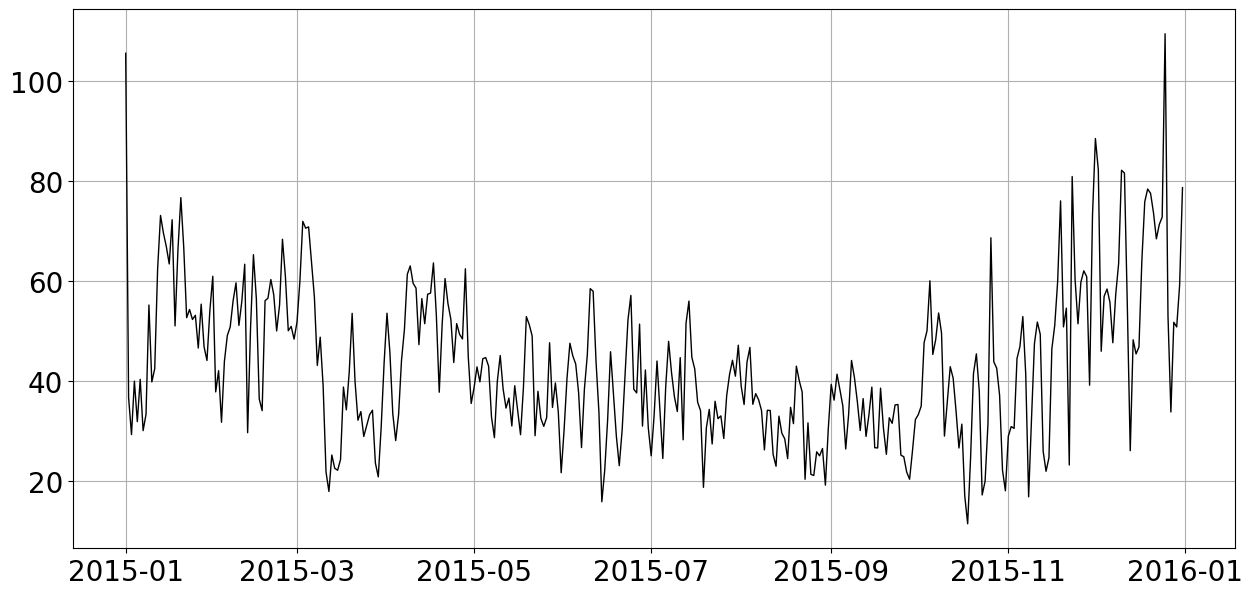

In [ ]:
plt.figure(figsize=(15,7), dpi=100)
plt.plot(df_15['PM10'],lw=1, color='black')
plt.tick_params(labelsize=20)
plt.grid(True)

In [ ]:
slope = mk.original_test(df_15['PM10'], alpha = 0.05).slope
intercept = mk.original_test(df_15['PM10'], alpha = 0.05).intercept

In [ ]:
linea = [] #Lista vacía
for i in range(0, len(df_15)):
    linea.append(slope*i+intercept) #recta de la pendiente de Sen

In [ ]:
linea = pd.DataFrame(linea,index = df_15.index)

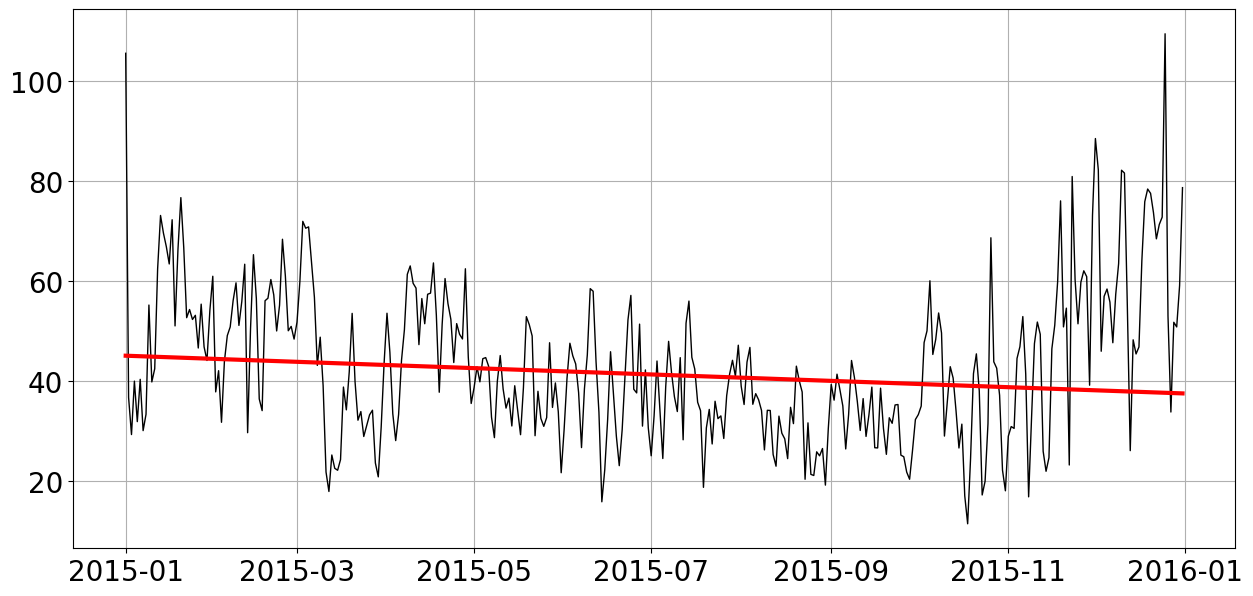

In [ ]:
plt.figure(figsize=(15,7), dpi=100)
plt.plot(df_15["PM10"],lw=1, color='black')
plt.plot(linea,lw=3, color='red') # Grafica la línea de tendencia obtenida con la pendiente de Sen
plt.tick_params(labelsize=20)
plt.grid(True)

¿Cúal fue la tendencia de 2020 a 2023?

In [ ]:
ruta='https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/rama_2020.csv'
df_20 = pd.read_csv(ruta, parse_dates = True, index_col=0)

ruta='https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/rama_2021.csv'
df_21 = pd.read_csv(ruta, parse_dates = True, index_col=0)

ruta='https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/rama_2022.csv'
df_22 = pd.read_csv(ruta, parse_dates = True, index_col=0)

ruta='https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/rama_2023.csv'
df_23 = pd.read_csv(ruta, parse_dates = True, index_col=0)

In [ ]:
df = pd.concat([df_20,df_21,df_22,df_23],axis=0)

In [ ]:
df

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
fecha,,,,,,,,
2020-01-01,0.428817,9.031579,13.382716,22.637895,18.774803,61.312903,26.716475,2.047619
2020-01-02,0.179193,4.286374,8.154297,12.235566,17.941581,26.385827,5.731481,0.942748
2020-01-03,0.306560,13.092157,21.731023,35.358824,24.060172,37.513944,11.231092,1.107143
2020-01-04,0.350833,11.978131,25.974958,38.288270,25.286115,52.280000,29.207951,7.677885
2020-01-05,0.427045,11.007952,29.782972,40.908549,30.433094,39.737609,21.806647,11.798077
...,...,...,...,...,...,...,...,...
2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683
2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588


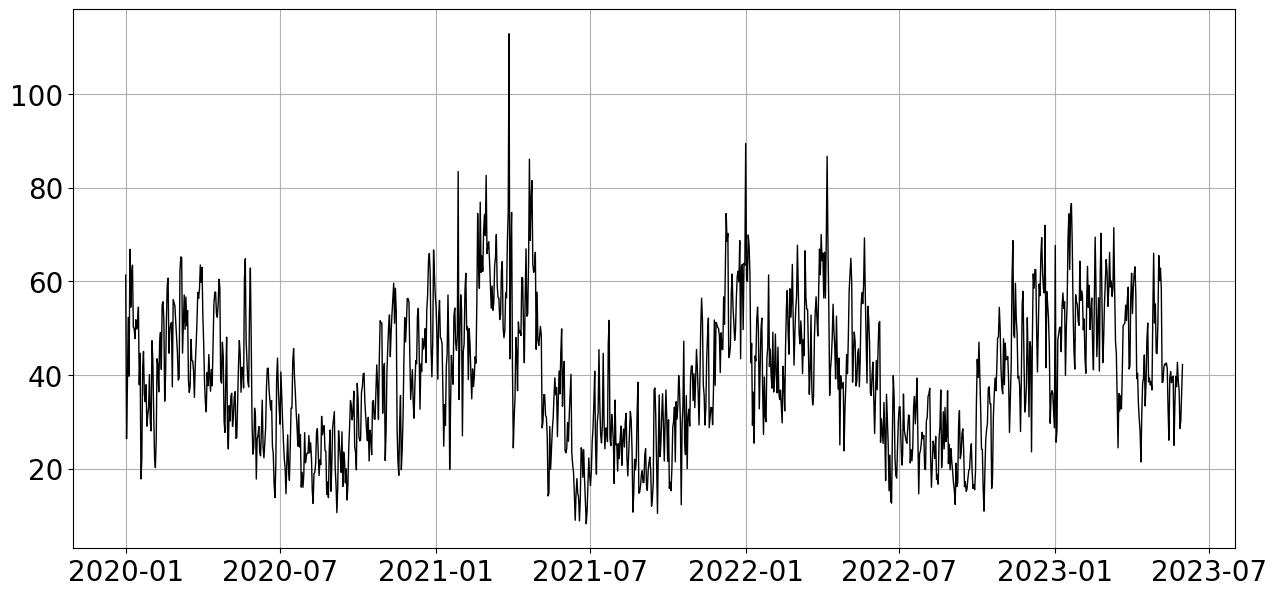

In [ ]:
plt.figure(figsize=(15,7), dpi=100)
plt.plot(df["PM10"],lw=1, color='black')
plt.tick_params(labelsize=20)
plt.grid(True)

In [ ]:
for val in df.columns: # Recorre cada nombre de columna que exista en el DataFrame 'df'
    resultado = mk.original_test(df[val], alpha = 0.05)
    print(val)
    for val_1 in resultado: print(val_1) #Imprimir uno por uno
    print('\n') #linea de separación en blanco

CO
increasing
True
0.0
11.162982537389231
0.21104133065424435
163954.0
215713956.66666666
0.00010859993276843735
0.29448769643071804


NO
increasing
True
3.577604879012597e-11
6.620593056880137
0.12516588769708617
97239.0
215713957.66666666
0.0033155730400020373
8.698442939898955


NO2
increasing
True
2.220446049250313e-16
8.219399797729825
0.15539188112465102
120721.0
215713955.66666666
0.003746181807094772
17.878128734179956


NOX
increasing
True
4.596323321948148e-14
7.542960607031686
0.14260356476731958
110786.0
215713956.66666666
0.007245417198841384
27.21820670174999


O3
no trend
False
0.4805763230288058
0.705375923705529
0.013336662886593957
10361.0
215713957.66666666
0.0005014150362987589
30.298729543496982


PM10
increasing
True
0.0007086436949528263
3.386212952661272
0.0640188136921871
49735.0
215713957.66666666
0.004152539098397998
36.330878589459246


PM25
increasing
True
0.01200550173515924
2.511982572377768
0.047491185908781396
36895.0
215713955.66666666
0.00142473873296

# Innovative Trend Analysis (ITA)

La **Innovative Trend Analysis (ITA)** es un método gráfico propuesto por Şen (2012) para detectar tendencias en series temporales sin asumir distribución, independencia o estacionaridad. Es especialmente útil para identificar cambios de tendencia locales o no lineales.
Su principal ventaja es que permite ver la tendencia directamente en una gráfica.

## Paso a paso del método

1. Dividir la serie temporal $x$ en dos mitades:
   - Pasado: $x_1 = [x_0, \dots, x_{n/2-1}]$
   - Presente: $x_2 = [x_{n/2}, \dots, x_{n-1}]$
2. Ordenar cada mitad ascendentemente (sin reordenar índices originales):
   - $x_1^* = \mathrm{sort}(x_1)$
   - $x_2^* = \mathrm{sort}(x_2)$
3. Graficar los pares $(x_1^*, x_2^*)$ en un diagrama de dispersión.
4. Añadir la línea de referencia 1:1 (diagonal) como referencia para ausencia de tendencia.

## Interpretación gráfica

- Puntos por encima de la diagonal: señal de tendencia creciente.
- Puntos por debajo: tendencia decreciente.
- Puntos dispersos simétricamente: sin tendencia global.
- Patrones específicos (como dispersión en extremos) pueden indicar tendencias parciales.

Sen Z. 2012. Innovative trend analysis methodology, J Hydrol Eng, 17 (9), pp. 1042–1046. https://doi.org/10.1061/(ASCE)HE.1943-5584.0000556

In [ ]:
df_15['PM10']

,PM10
fecha,
2015-01-01,105.573684
2015-01-02,36.687845
2015-01-03,29.269022
2015-01-04,39.961538
2015-01-05,31.855643
...,...
2015-12-27,33.779817
2015-12-28,51.736973
2015-12-29,50.809013


In [ ]:
int(len(df_15)/2) # mitad del número total de filas del DataFrame df_15

182

In [ ]:
p1 = df_15["PM10"].iloc[0:int(len(df_15)/2)]

In [ ]:
p2 = df_15["PM10"].iloc[int(len(df_15)/2):2*int(len(df_15)/2)]

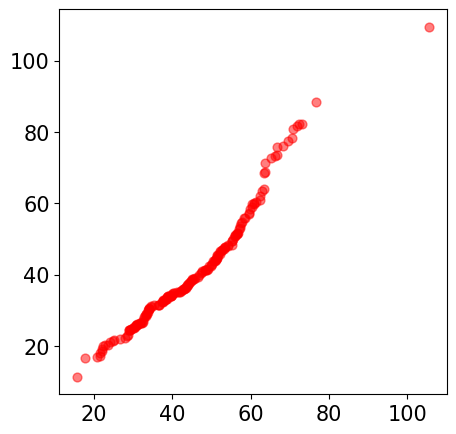

In [ ]:
fig = plt.figure(figsize=(5,5), dpi=100)
plt.scatter(sorted(p1),sorted(p2), s=40, color='red',alpha=0.5)
plt.tick_params(labelsize=15)


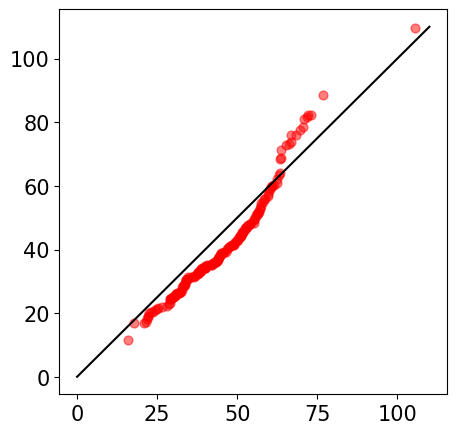

In [ ]:
fig = plt.figure(figsize=(5,5), dpi=100)
plt.scatter(sorted(p1),sorted(p2), s=40, color='red', alpha=0.5);
plt.tick_params(labelsize=15)

x_min = 0
x_max = 110
x_vals = np.linspace(x_min, x_max, 100)

plt.plot(x_vals, x_vals, color='black')
plt.show()